In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

<b>Image link: http://sipi.usc.edu/database/database.php?volume=misc&image=27#top </b>

Submatrix of original image (60 x 60)


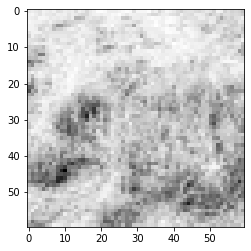

In [2]:
# img = plt.imread("7.1.01.tiff")
img1 = plt.imread("7.1.03.tiff")
img1 = img1[90:150,120:180] #sub-matrix of original image (60 x 60)
# img2 = plt.imread("7.1.05.tiff")
# img2 = img2[90:150,120:180] #sub-matrix of original image (60 x 60)
plt.imshow(img1,cmap='Greys_r')
print("Submatrix of original image (60 x 60)")
plt.show()

# Question 1: 

<b> 1.1 From first principles i.e., as a summation over two dimensions </b>

In [3]:
def dft_2d(image):
    data = np.asarray(image)
    M, N = image.shape 
    dft2d = np.zeros((M,N),dtype = complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = complex((np.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N)))/(M*N))
                    sum_matrix +=  np.dot(data[m,n], e)
            dft2d[k,l] = sum_matrix
    return dft2d

def idft_2d(image):
    data = np.asarray(image)
    M, N = image.shape 
    dft2d = np.zeros((M,N),dtype = complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = complex((np.exp( 2j * np.pi * ((k * m) / M + (l * n) / N)))/(M*N))
                    sum_matrix +=  np.dot(data[m,n], e)
            dft2d[k,l] = sum_matrix
    return dft2d

dft = dft_2d(img1)
idft = idft_2d(dft)     

<b>Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation </b>

All operations from first principles
Original resized image


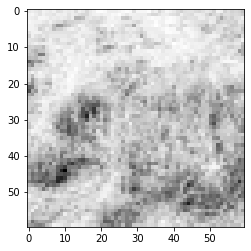

Magnitude Plot


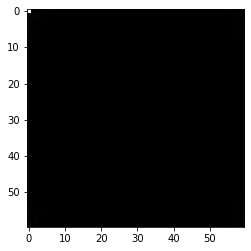

Log Magnitude plot


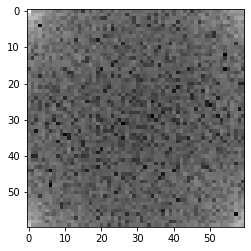

Phase plot


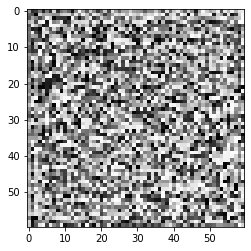

In [4]:
print("All operations from first principles")
plt.imshow(img1,cmap='Greys_r')
print("Original resized image")
plt.show()
plt.imshow((np.abs(dft)),cmap="Greys_r")
print("Magnitude Plot")
plt.show()
plt.imshow((20*np.log(np.abs(dft))),cmap="Greys_r")
print("Log Magnitude plot")
plt.show()
plt.imshow(np.angle(dft),cmap="Greys_r")
print("Phase plot")
plt.show()

<b>Generate the centered DFT</b>

Centered magnitude image


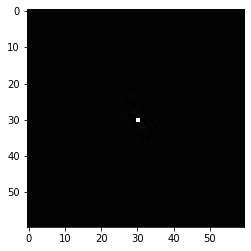

Centered Log Magnitude plot


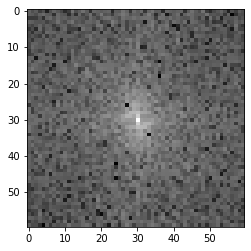

In [5]:
w,h = dft.shape
dft_centre = np.zeros((w,h))

for i in range(w):
    for j in range(h):
        dft_centre[i][j] = (np.power(-1,(i+j))*img1[i][j])

dft_xx = dft_2d(dft_centre)

plt.imshow(dft_xx.real,cmap='Greys_r')
print("Centered magnitude image")
plt.show() 
plt.imshow((20*np.log(np.abs(dft_xx))),cmap="Greys_r")
print("Centered Log Magnitude plot")
plt.show()

<b>IDFT[DFT[I]] = I </b>

IDFT plot of DFT


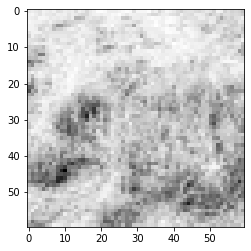

In [6]:
plt.imshow(np.abs(idft),cmap='Greys_r')
print("IDFT plot of DFT")
plt.show()

<b> Show the importance of phase by transposing the phase matrix and then synthesizing the image. Repeat by
a) setting the phase to 0, and b) by adding noise. </b>

IDFT plot of DFT (phase transpose)


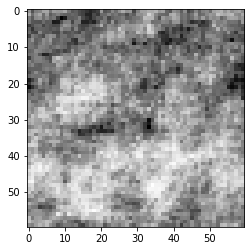

IDFT plot of DFT (phase 0)


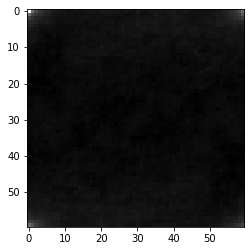

IDFT plot of DFT (phase with gaussian noise)


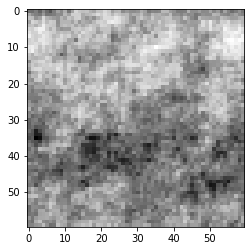

In [7]:
phase = np.angle(dft)
mag = np.abs(dft)
phase_trans = phase.T
phase_zero = np.zeros(phase.shape)
mu, sigma = 0, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, (phase.shape))
phase_noise = phase + s

res1 = idft_2d(mag*(np.exp(2j * phase_trans)))
res2 = idft_2d(mag*(np.exp(2j * phase_zero)))
res3 = idft_2d(mag*(np.exp(2j * phase_noise)))

plt.imshow(res1.real,cmap='Greys_r')
print("IDFT plot of DFT (phase transpose)")
plt.show()
plt.imshow(res2.real,cmap='Greys_r')
print("IDFT plot of DFT (phase 0)")
plt.show()
plt.imshow(res3.real,cmap='Greys_r')
print("IDFT plot of DFT (phase with gaussian noise)")
plt.show()

<b> 1.2 DFT using the complex exponential matrix </b>

In [8]:
def dft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = complex(np.exp( - 2j * np.pi * 1 / N ))
    W = (np.power( omega, i * j ) /(N))
    return W

h,w= img1.shape
W = dft_matrix(h)
fast_dft = W.dot(img1).dot(W)
inv = np.linalg.inv(W)
fast_idft = inv.dot(fast_dft).dot(inv)

IDFT plot of DFT (phase transpose)


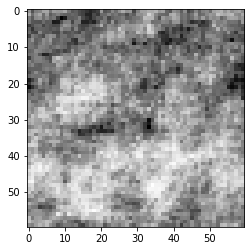

IDFT plot of DFT (phase 0)


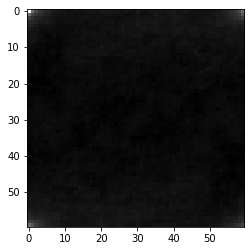

IDFT plot of DFT (phase with gaussian noise)


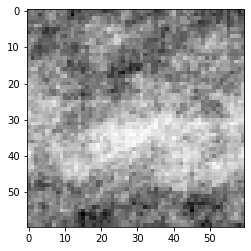

In [9]:
phase = np.angle(fast_dft)
mag = np.abs(fast_dft)
phase_trans = phase.T
phase_zero = np.zeros(phase.shape)
mu, sigma = 0, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, (phase.shape))
phase_noise = phase + s


h,w = phase.shape
W = dft_matrix(h)
inv = np.linalg.inv(W)

fres1 = mag*(np.exp(2j * phase_trans))
fres2 = mag*(np.exp(2j * phase_zero))
fres3 = mag*(np.exp(2j * phase_noise))
fast_idft1 = inv.dot(fres1).dot(inv)
fast_idft2 = inv.dot(fres2).dot(inv)
fast_idft3 = inv.dot(fres3).dot(inv)

plt.imshow(fast_idft1.real,cmap='Greys_r')
print("IDFT plot of DFT (phase transpose)")
plt.show()
plt.imshow(fast_idft2.real,cmap='Greys_r')
print("IDFT plot of DFT (phase 0)")
plt.show()
plt.imshow(fast_idft3.real,cmap='Greys_r')
print("IDFT plot of DFT (phase with gaussian noise)")
plt.show()


<b>Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation </b>

All operations using DFT matrix
Submatrix of original image


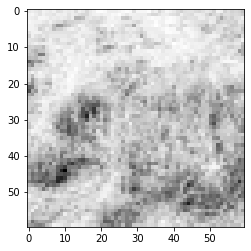

Magnitude Plot


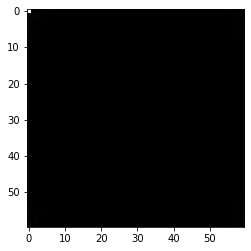

Log Magnitude plot


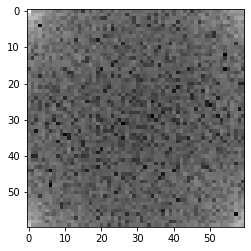

Phase plot


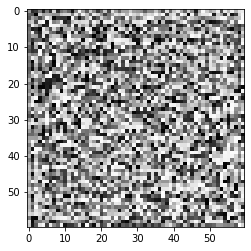

In [10]:
print("All operations using DFT matrix")
plt.imshow(img1,cmap='Greys_r')
print("Submatrix of original image")
plt.show()
plt.imshow((np.abs(fast_dft)),cmap="Greys_r")
print("Magnitude Plot")
plt.show()
plt.imshow((20*np.log(np.abs(fast_dft))),cmap="Greys_r")
print("Log Magnitude plot")
plt.show()
plt.imshow(np.angle(fast_dft),cmap="Greys_r")
print("Phase plot")
plt.show()

<b>Generate the centered DFT</b>

Centered magnitude image


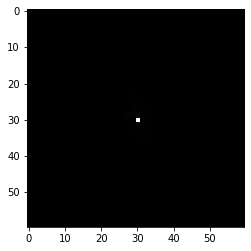

Centered Log Magnitude plot


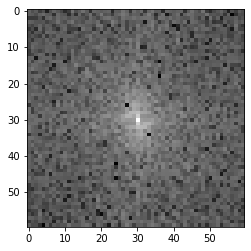

In [11]:
w,h = img1.shape
dft_centre = np.zeros((w,h))

for i in range(w):
    for j in range(h):
        dft_centre[i][j] = (np.power(-1,(i+j))*img1[i][j])

W = dft_matrix(h)
fast_dft = W.dot(dft_centre).dot(W)

plt.imshow(np.abs(dft_xx),cmap='Greys_r')
print("Centered magnitude image")
plt.show() 
plt.imshow((20*np.log(np.abs(dft_xx))),cmap="Greys_r")
print("Centered Log Magnitude plot")
plt.show()

<b>IDFT[DFT[I]] = I </b>

IDFT plot of DFT (matrix)


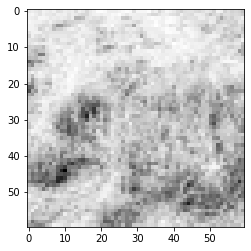

In [12]:
plt.imshow(np.abs(fast_idft),cmap="Greys_r")
print("IDFT plot of DFT (matrix)")
plt.show()

# Question 2:

<b> 2.1 Circulary convolve two images. Test your program by using an image and an averaging filter of size 5 × 5</b>

Original image


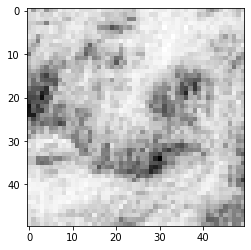

Circular convolution (5x5) averaging filter


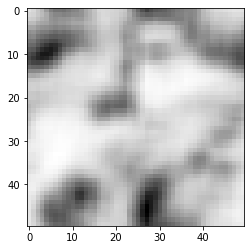

In [13]:
def circular_conv2d(data1,data2):
    M, N = img1.shape 
    temp = np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            sum_matrix = 0.0
            for p in range(M):
                for q in range(N):
                    e = data1[np.mod((i-p),N),np.mod((j-q),M)]
                    sum_matrix +=  np.dot(data2[p,q], e)
            temp[i,j] = sum_matrix
    return temp

img3 = plt.imread("7.1.01.tiff")
img1 = plt.imread("7.1.03.tiff")
img1 = img1[100:150,100:150] #sub-matrix of original image 
img2 = plt.imread("7.1.05.tiff")
# img2 = img2[90:150,120:180] #sub-matrix of original image (60 x 60)
plt.imshow(img1,cmap='Greys_r')
print("Original image")
plt.show()

h, w = img1.shape 
kernel = np.ones([5,5])  #averaging filter
kernel = kernel/25
kh,kw= kernel.shape
pad = (h - kh, w - kw)  # total amount of padding
kernel = np.pad(kernel, ((math.floor((pad[0]+1)/2), math.floor(pad[0]/2)), (math.floor((pad[1]+1)/2), math.floor(pad[1]/2))), 'constant')
# print(kernel.shape)
cc = circular_conv2d(img1,kernel)
plt.imshow(cc,cmap="Greys_r")
print("Circular convolution (5x5) averaging filter")
plt.show()

<b> 2.2 Linearly convolve the same image and filter using the circular convolution function above after appropriate zero padding </b>

Original image


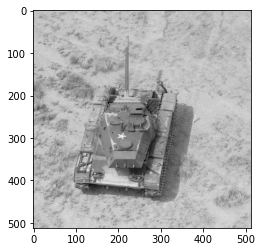

Linear convolution with (5x5) average filter


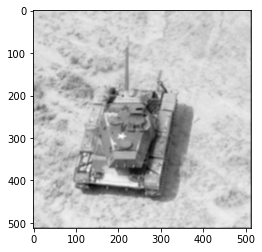

In [5]:
def lin_conv2d(image, kernel):
    w,h =image.shape   
    kernel = np.flipud(np.fliplr(kernel)) 
    k_w,k_h = kernel.shape
    output = np.zeros((w,h))            
    image_padded = np.zeros((w + (k_w-1), h + (k_h-1)))   
    image_padded[math.floor(k_w/2):-math.floor(k_w/2), math.floor(k_h/2):-math.floor(k_h/2)] = image    
    for x in range(w):    
        for y in range(h):
            output[y,x]=(kernel*image_padded[y:y + k_w, x:x + k_h]).sum()
    return output

img3 = plt.imread("7.1.01.tiff")
img1 = plt.imread("7.1.03.tiff")
# img1 = img1[100:150,100:150] #sub-matrix of original image 
img2 = plt.imread("7.1.05.tiff")
# img2 = img2[90:150,120:180] #sub-matrix of original image (60 x 60)
plt.imshow(img1,cmap='Greys_r')
print("Original image")
plt.show()

kernel = np.ones([5,5])  
kernel = kernel/25 #averaging filter
cnv_img = lin_conv2d(img1,kernel)
plt.imshow(cnv_img, cmap='Greys_r')
print("Linear convolution with (5x5) average filter")
plt.show()

<b>2.3 Linear covolution using the DFT of zero padded images</b>

Linear convolution with DFT


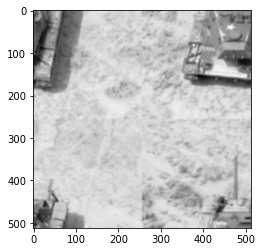

In [15]:
img3 = plt.imread("7.1.01.tiff")
img1 = plt.imread("7.1.03.tiff")
# img1 = img1[100:150,100:150] #sub-matrix of original image 
img2 = plt.imread("7.1.05.tiff")
# img2 = img2[90:150,120:180] #sub-matrix of original image (60 x 60)
# plt.imshow(img1,cmap='Greys_r')
# print("Original image")
# plt.show()

h,w = img1.shape
W = dft_matrix(h)
fast_dft = W.dot(img1).dot(W) #DFT of image

kernel = np.ones([5,5])  #averaging filter
kernel = kernel/25
kh,kw= kernel.shape
pad = (h - kh, w - kw)  # total amount of padding
kernel = np.pad(kernel, ((math.floor((pad[0]+1)/2), math.floor(pad[0]/2)), (math.floor((pad[1]+1)/2), math.floor(pad[1]/2))), 'constant')
kh,kw= kernel.shape
KW = dft_matrix(kh)
ker_fast_dft = KW.dot(kernel).dot(KW) #DFT of kernel

final = fast_dft*ker_fast_dft #convolution is multiplication in frequency domain

h,w = final.shape
W = dft_matrix(h)
inv = np.linalg.inv(W)
fast_idft = inv.dot(final).dot(inv) #idft to get image
        
plt.imshow(np.abs(fast_idft),cmap='Greys_r')
print("Linear convolution with DFT")
plt.show()

# Question 3

Original image


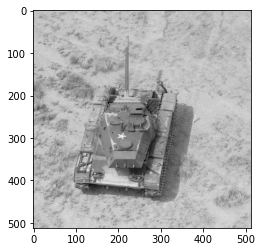

In [3]:
img3 = plt.imread("7.1.01.tiff")
img1 = plt.imread("7.1.03.tiff")
# img1 = img1[0:500,0:500] #sub-matrix of original image (60 x 60)
img2 = plt.imread("7.1.05.tiff")
# img2 = img2[90:150,120:180] #sub-matrix of original image (60 x 60)
plt.imshow(img1,cmap='Greys_r')
print("Original image")
plt.show()

<b> 3.1 Average filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between
denoising and smoothing</b>

Noisy Image


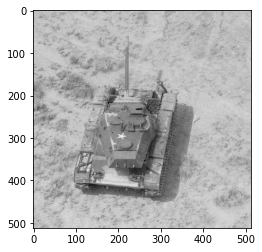

3877.8735923612503
Linear convolution with 3x3 average filter


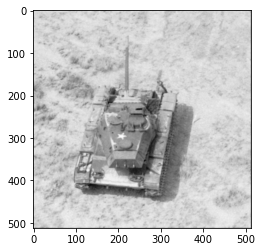

5038.569857849381
Linear convolution with 5x5 average filter


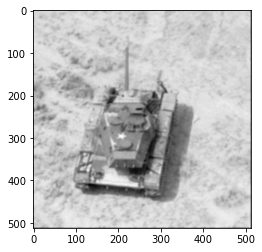

5843.988572110177
Linear convolution with 7x7 average filter


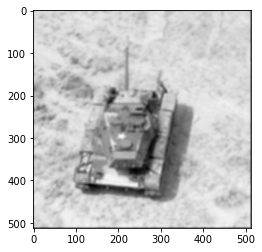

6475.041755376645
Linear convolution with 9x9 average filter


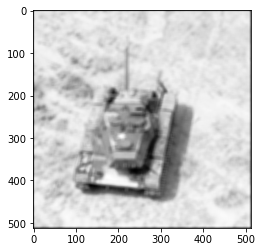

7005.328145147024
Linear convolution with 11x11 average filter


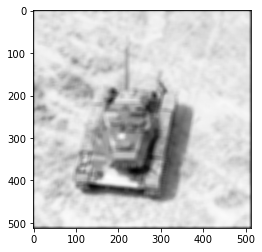

7473.036456167383
Linear convolution with 13x13 average filter


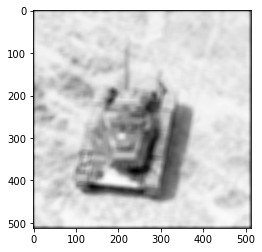

7895.122861024698
Linear convolution with 15x15 average filter


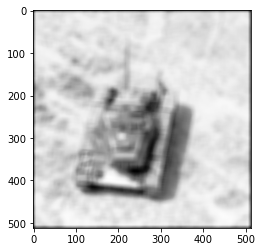

In [8]:
mu, sigma = 0, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, (img1.shape))
img_n = img1.copy() 
noisy_image = img_n + s
plt.imshow(noisy_image,cmap='Greys_r')
print("Noisy Image")
plt.show()


size = [3, 5, 7, 9, 11, 13, 15]
for s in size:
    kernel = np.ones([s,s])
    kernel = kernel/np.square(s)
    cnv_img = lin_conv2d(noisy_image,kernel)
    plt.imshow(cnv_img, cmap='Greys_r')
    print("Linear convolution with {}x{} average filter".format(s,s))
    plt.show()  
    

<b> appropriate size of filter can be 3x3 since beyond that its starts to smooth too much </b>

<b>3.2 Gaussian filter of size 5 × 5. Experiment with the standard deviation σ h of the filter from 0.5 to 5 in steps of
0.5 and observe its effect on denoising</b>

Noisy Image


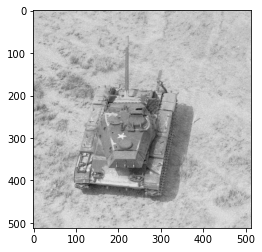

Linear convolution with 5x5 gaussian filter with sigma 0.5


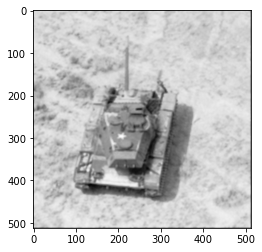

Linear convolution with 5x5 gaussian filter with sigma 1


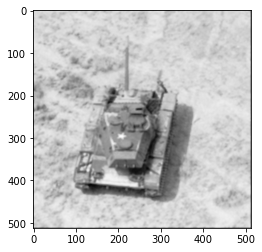

Linear convolution with 5x5 gaussian filter with sigma 1.5


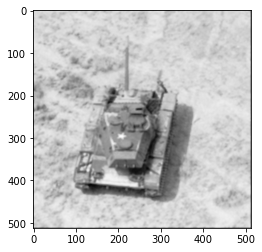

Linear convolution with 5x5 gaussian filter with sigma 2


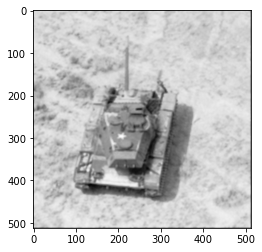

Linear convolution with 5x5 gaussian filter with sigma 2.5


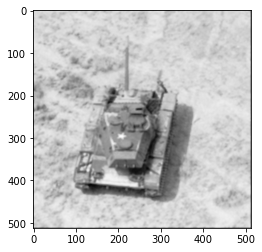

Linear convolution with 5x5 gaussian filter with sigma 3


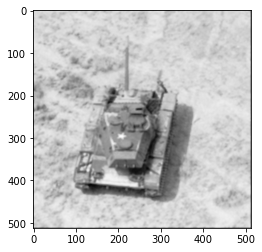

Linear convolution with 5x5 gaussian filter with sigma 3.5


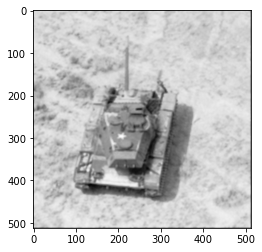

Linear convolution with 5x5 gaussian filter with sigma 4


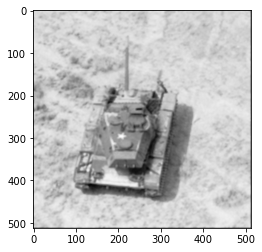

Linear convolution with 5x5 gaussian filter with sigma 4.5


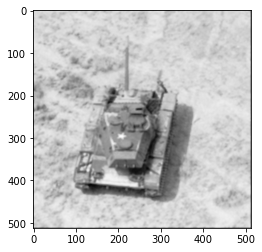

Linear convolution with 5x5 gaussian filter with sigma 5


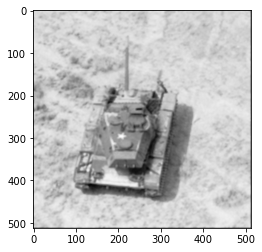

In [23]:
mu, sigma = 0, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, (img1.shape))
img_n = img1.copy() 
noisy_image = img_n + s
plt.imshow(noisy_image,cmap='Greys_r')
print("Noisy Image")
plt.show()

def gauss_ker(size,sigma):
    center = (int)(size/2)
    kernel = np.zeros((size,size))
    for i in range(size):
       for j in range(size):
        diff = np.sqrt((i-center)**2+(j-center)**2)
        kernel[i,j] = np.exp(-(diff**2)/(2*sigma**2)).sum()
    return kernel/kernel

sigma = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for s in sigma:
    ker = gauss_ker(5,s)
    cnv_img = lin_conv2d(noisy_image,ker)
    plt.imshow(cnv_img, cmap='Greys_r')
    print("Linear convolution with 5x5 gaussian filter with sigma {}".format(s))
    plt.show()
